In [9]:
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 三分损益律（五度相生律）

In [10]:
max_k = 15
fifth = np.ones(max_k)
fifth[0] = 2
for i in range(2,max_k):
    fifth[i] = fifth[i-1] * 3/2
    if fifth[i] > 2:
        fifth[i] /= 2
print(fifth)

[2.         1.         1.5        1.125      1.6875     1.265625
 1.8984375  1.42382812 1.06787109 1.60180664 1.20135498 1.80203247
 1.35152435 1.01364326 1.5204649 ]


In [11]:
lg_fifth = np.log2(fifth)
std, ratio = [], []
for k in range(2, max_k+1):
    ordered = lg_fifth[:k]
    ordered.sort()
    diff = ordered[1:] - ordered[:-1]
    std += [diff.std()]
    ratio += [diff.max()/diff.min()]
print(std)

[0.0, 0.08496250072115619, 0.1155471395825229, 0.10010653654187576, 0.03683420024063736, 0.04926908091238547, 0.04279804225623922, 0.04532203956894078, 0.042262980144167024, 0.03597276037324042, 0.026603404329680676, 0.009638284246383971, 0.01878047733989351, 0.022582950842632468]


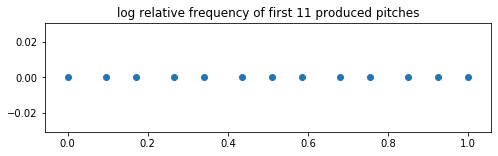

In [12]:
k = 11
lg_fifth_2 = np.log2(fifth[:k+2])
plt.figure(figsize=(8,2))
plt.scatter(lg_fifth_2, np.zeros(lg_fifth_2.size))
plt.title('log relative frequency of first {} produced pitches' .format(k))
plt.show()

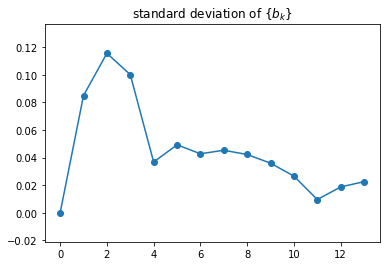

In [13]:
plt.scatter(np.arange(len(std)), std)
plt.plot(np.arange(len(std)), std)
plt.title('standard deviation of $\{b_k\}$')
plt.savefig('std.svg')
plt.show()

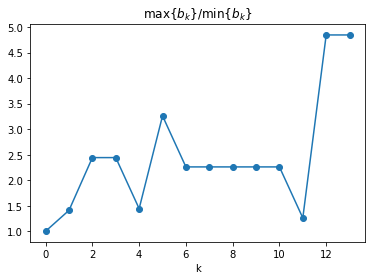

In [14]:
ratio = np.array(ratio)
plt.scatter(np.arange(len(ratio)), ratio)
plt.plot(np.arange(len(ratio)), ratio)
plt.title('$\max\{b_k\}/\min\{b_k\}$')
plt.xlabel('k')
plt.savefig('max_by_min.svg')
plt.show()

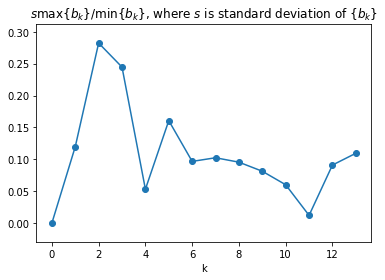

In [16]:
std= np.array(std)
plt.scatter(np.arange(len(std)), std*ratio)
plt.plot(np.arange(len(std)), std*ratio)
plt.title('$s\max\{b_k\}/\min\{b_k\}$, where $s$ is standard deviation of $\{b_k\}$')
plt.xlabel('k')
plt.savefig('ratiostd.svg')
plt.show()